In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
GDP = pd.read_csv('/content/1697667169730-GDP.csv',encoding='UTF-8-sig',sep=',')
GDP.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8948.946623,8617.407888,9262.492619,9292.956732,9063.896306,8754.30486,8578.345113,8456.65185,8238.098259,8246.351581
2,Angola,AGO,14384.761840,13120.13335,9642.526050,9461.039214,10538.58201,11603.52363,12053.94792,12211.18895,...,20750.617000,20250.418470,21209.387460,21475.279260,21704.449360,21126.64014,19854.887150,19125.64020,18079.185140,17339.271710
3,Albania,ALB,9013.241061,8369.95369,9436.839108,10484.991210,12285.38974,13580.98312,11832.93502,13051.71656,...,29728.235970,27056.594940,28608.461540,31721.082180,32838.340220,31715.69187,31448.227580,31589.09409,31104.970770,31009.390130
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
coloumns = ['Country Code','2019']
GDP1991 = GDP[coloumns]
GDP1991 = GDP1991.rename(columns={'2019':'GDP'})
GDP1991.head()

,Country Code,GDP
0,ABW,NaN
1,AFG,8246.351581
2,AGO,17339.271710
3,ALB,31009.390130
4,AND,NaN


In [83]:
unemployment = pd.read_csv('/content/1697667179137-Unemployment.csv',encoding='UTF-8-sig',sep=',')
unemployment.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,11.380000,11.46,11.61,11.65,11.65,11.65,11.640000,11.640000,...,11.52,11.51,11.52,11.54,11.450000,11.390000,11.31,11.18,11.06,10.98
2,Angola,AGO,3.750000,3.78,3.85,3.87,3.86,3.86,3.860000,3.860000,...,9.43,7.36,7.37,7.38,7.310000,7.260000,7.20,7.10,7.00,6.93
3,Albania,ALB,16.219999,16.33,16.52,16.57,16.57,16.57,16.549999,16.549999,...,14.09,13.48,13.38,15.87,18.059999,17.190001,15.42,13.62,12.30,11.47
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
coloumns = ['Country Code','2019']
unemployment1991 = unemployment[coloumns]
unemployment1991 = unemployment1991.rename(columns={'2019':'Unemployment'})
unemployment1991.head()

,Country Code,Unemployment
0,ABW,NaN
1,AFG,10.98
2,AGO,6.93
3,ALB,11.47
4,AND,NaN


In [85]:
GDPxUnemployment = pd.merge(left=GDP1991,right=unemployment1991,left_on='Country Code',right_on='Country Code')
#GDPxUnemployment.set_index('Country Code',inplace=True)
GDPxUnemployment.head()

,Country Code,GDP,Unemployment
0,ABW,NaN,NaN
1,AFG,8246.351581,10.98
2,AGO,17339.271710,6.93
3,ALB,31009.390130,11.47
4,AND,NaN,NaN


In [86]:
sns.set_palette('Spectral')
sns.set_style('ticks')

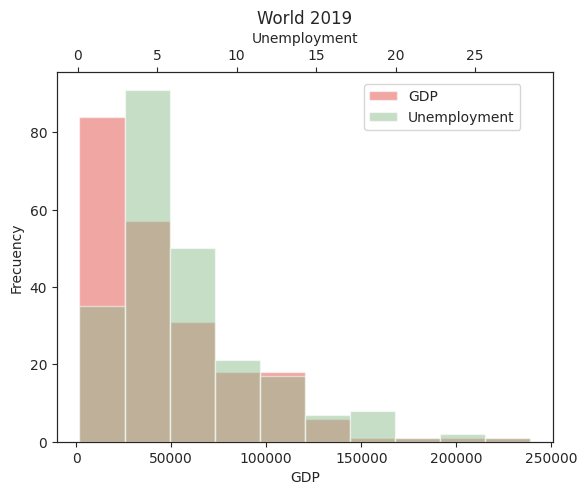

In [87]:
fig,ax1 = plt.subplots()

ax1.hist(GDPxUnemployment['GDP'],alpha=0.5,label='GDP')
ax1.set_xlabel('GDP')
ax1.set_xlabel('GDP')
ax1.set_ylabel('Frecuency')
ax2 = ax1.twiny()
ax2.hist(GDPxUnemployment['Unemployment'],alpha=0.5,label='Unemployment',color='darkseagreen')
ax2.set_xlabel('Unemployment')

plt.title('World 2019')
fig.legend(bbox_to_anchor=(0.86,0.87))
plt.show()

In [88]:
continets = pd.read_csv('/content/1697667198096-Continents.csv',encoding='UTF-8-sig',sep=',')
continets.head()

,Name,Country Code,Continent,Region
0,Afghanistan,AFG,Asia,Southern Asia
1,Åland Islands,ALA,Europe,Northern Europe
2,Albania,ALB,Europe,Southern Europe
3,Algeria,DZA,Africa,Northern Africa
4,American Samoa,ASM,Oceania,Polynesia


In [98]:
GDPxUnemploymentxContinets = pd.merge(left=GDPxUnemployment,right=continets,left_on='Country Code',right_on='Country Code')
GDPxUnemploymentxContinets.head()

,Country Code,GDP,Unemployment,Name,Continent,Region
0,ABW,NaN,NaN,Aruba,Americas,Latin America and the Caribbean
1,AFG,8246.351581,10.98,Afghanistan,Asia,Southern Asia
2,AGO,17339.271710,6.93,Angola,Africa,Sub-Saharan Africa
3,ALB,31009.390130,11.47,Albania,Europe,Southern Europe
4,AND,NaN,NaN,Andorra,Europe,Southern Europe


In [99]:
GDPxUnemploymentxContinetsAvg = GDPxUnemploymentxContinets.groupby('Continent')[['GDP', 'Unemployment']].mean()
GDPxUnemploymentxContinetsAvg

,GDP,Unemployment
Continent,,
Africa,16870.222166,8.358113
Americas,41861.482377,7.554849
Asia,52018.493888,5.709600
Europe,85926.422765,6.761282
Oceania,36056.567613,5.731818


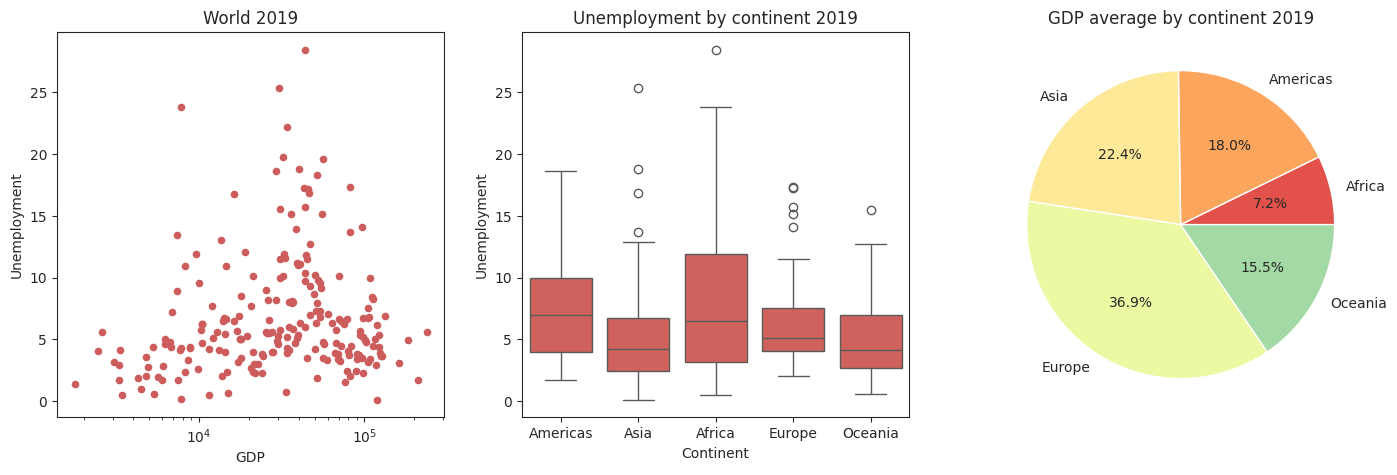

In [129]:
sns.set_palette('Spectral')
sns.set_style('ticks')

fig = plt.figure(figsize=(17,5))

ax1 = fig.add_subplot(131)
GDPxUnemployment.plot(kind='scatter',x='GDP',y='Unemployment',color='indianred',logx=True,ax=ax1)
ax1.set_title('World 2019')

ax2= fig.add_subplot(132)
sns.boxplot(x='Continent',y='Unemployment',data=GDPxUnemploymentxContinets,ax=ax2)
ax2.set_title('Unemployment by continent 2019')

ax3 = fig.add_subplot(133)
GDPxUnemploymentxContinetsAvg['GDP'].plot(kind='pie',labels=GDPxUnemploymentxContinetsAvg.index,autopct='%1.1f%%',ax=ax3)
ax3.set_title('GDP average by continent 2019')
ax3.set_ylabel('')

plt.show()

In [135]:
GDPMexico = GDP[GDP['Country Name']=='Mexico']
GDPMexico.drop('Country Code',axis=1,inplace=True)
GDPMexico.set_index('Country Name',inplace=True)
GDPMexico = GDPMexico.T
GDPMexico.rename_axis('Year',inplace=True)
GDPMexico.columns = ['GDP']
GDPMexico.head()

<ipython-input-135-cfc2923bf2c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GDPMexico.drop('Country Code',axis=1,inplace=True)


,GDP
Year,
1991,43868.90541
1992,43804.94070
1993,43077.84603
1994,44715.30806
1995,42238.58102


In [142]:
unemploymentMexico = unemployment[unemployment['Country Name']=='Mexico']
unemploymentMexico.drop('Country Code',axis=1,inplace=True)
unemploymentMexico.set_index('Country Name',inplace=True)
unemploymentMexico = unemploymentMexico.T
unemploymentMexico.rename_axis('Year',inplace=True)
unemploymentMexico.columns = ['unemployment']
unemploymentMexico.head()

<ipython-input-142-10674a16a395>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemploymentMexico.drop('Country Code',axis=1,inplace=True)


,unemployment
Year,
1991,3.15
1992,3.24
1993,3.37
1994,4.44
1995,7.10


In [143]:
GDPxUnemploymentMexico = pd.merge(left=GDPMexico,right=unemploymentMexico,left_index=True,right_index=True)
GDPxUnemploymentMexico.head()

,GDP,unemployment
Year,,
1991,43868.90541,3.15
1992,43804.94070,3.24
1993,43077.84603,3.37
1994,44715.30806,4.44
1995,42238.58102,7.10


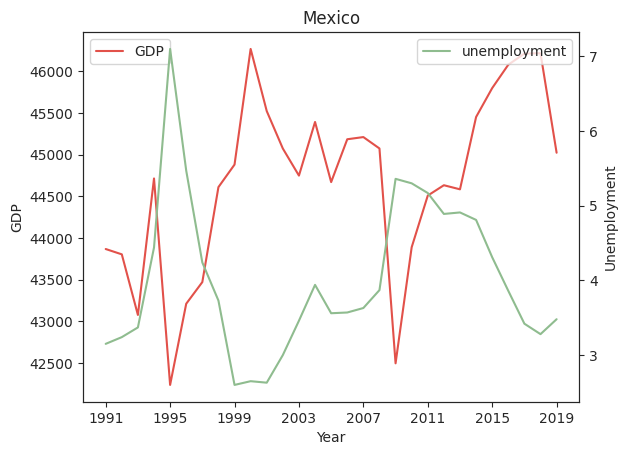

In [149]:
fig,ax1 = plt.subplots()
ax1.set_title('Mexico')


ax1 = sns.lineplot(x=GDPxUnemploymentMexico.index,y=GDPxUnemploymentMexico['GDP'],label='GDP')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')

ax2 = ax1.twinx()
sns.lineplot(x=GDPxUnemploymentMexico.index,y=GDPxUnemploymentMexico['unemployment'],label='unemployment',color='darkseagreen',ax=ax2)
ax2.set_ylabel('Unemployment')


plt.xticks(np.arange(0,len(GDPxUnemploymentMexico)+1,4))
plt.show()